# This is our initial baseline model
Also to see if the dark images have (JPG only) really have any information.
If this method could get it, the DL way will surly do better.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def plot_hist(img):
    """
    Plots the histogram of an RGB image in all the channels
    
    :param img: Input image
    """
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
    plt.show()

In [3]:
short = cv2.imread('imgs/short.JPG')
long = cv2.imread('imgs/long.JPG')

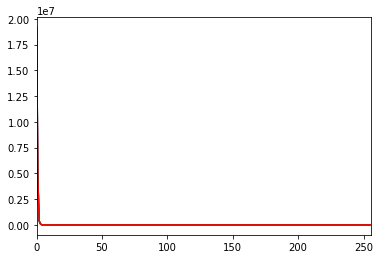

In [4]:
plot_hist(short)

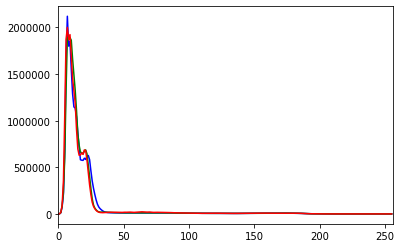

In [5]:
plot_hist(long)

In [6]:
def equalize_hist(img):
    """
    Runs the equalizeHist over each channel and cats them
    for output
    
    :param img: Input image of RGB format
    """
    res = []
    for channel in np.dsplit(img, img.shape[-1]):
        res.append(cv2.equalizeHist(channel))
    res = np.dstack(res)
    plt.imshow(res)
    return res

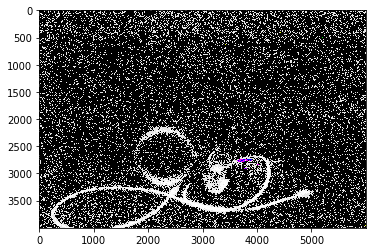

In [7]:
short_eq = equalize_hist(short)

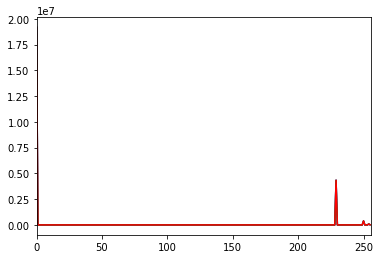

In [9]:
plot_hist(short_eq)

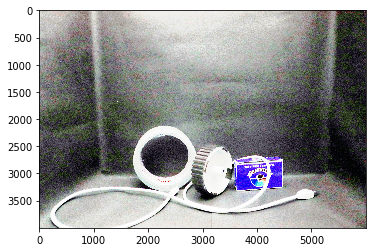

In [8]:
long_eq = equalize_hist(long)

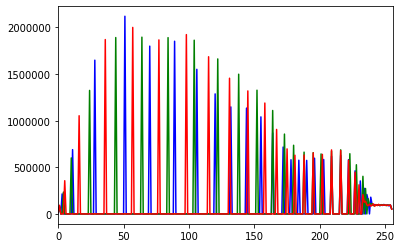

In [10]:
plot_hist(long_eq)

In [11]:
def clahe(img):
    """
    :param img: Input image of RGB format
    """
    res = []
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    for channel in np.dsplit(img, img.shape[-1]):
        res.append(clahe.apply(channel))
    res = np.dstack(res)
    plt.imshow(res)

In [13]:
def denoise(img):
    dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
    plt.imshow(dst)

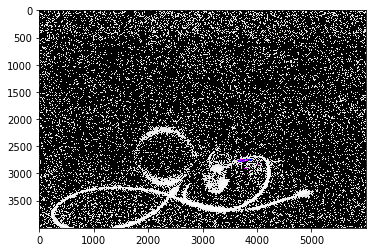

In [15]:
denoise(short_eq)